In [5]:
# Load the text data
import pandas as pd 

text_data = pd.read_csv("mini-vqa_starter2.csv", header=None)

In [24]:
text_data.head()

,0,1,2
0,is this man a professional baseball player,yes,COCO_train2014_000000458752.jpg
1,is the dog waiting,yes,COCO_train2014_000000524291.jpg
2,is the sky blue,yes,COCO_train2014_000000393221.jpg
3,is the window open,yes,COCO_train2014_000000393223.jpg
4,is the man smiling,no,COCO_train2014_000000393224.jpg


In [7]:
# Extract different components
questions = text_data[0]
answers = text_data[1]
images_name = text_data[2]

is this man a professional baseball player
is the dog waiting
is the sky blue
is the window open
is the man smiling


In [9]:
# Check the proportion of answers
n_yes = sum(answers == 'yes')
print("Proportion of yes: " + str(n_yes/answers.size))

In [27]:
# Convert answers to numeric values
answers[answers=='yes'] = 1
answers[answers=='no'] = 0

In [36]:
######## Preprocess the images
import os
from PIL import Image  
from itertools import compress
import time

# Start time stamp
t = time.time()

# Get all the images
current_dir = os.getcwd()
original_image_folder = os.path.join(current_dir, "OriginalImage")
list_all = os.listdir(original_image_folder)
is_file = [os.path.isfile(os.path.join(original_image_folder, list_name)) for list_name in list_all]
all_image_list = list(compress(list_all, is_file))

# Resize the select images and save to a different folder
RESIZE_IMAGE = (299, 299)
select_image_folder = os.path.join(current_dir, "SelectImage")
for select_image_name in images_name:
    # Get the original image and resize
    image_dir = os.path.join(original_image_folder, select_image_name)
    select_image = Image.open(image_dir)
    select_image_resize = select_image.resize(RESIZE_IMAGE)
    
    # Save the resized image to new folder
    new_image_dir = os.path.join(select_image_folder, select_image_name)
    select_image_resize.save(new_image_dir)
    
# End time stamp
elapsed = time.time() - t
print("Time taken: " + str(elapsed/60) + " minutes")    

293.2448778152466


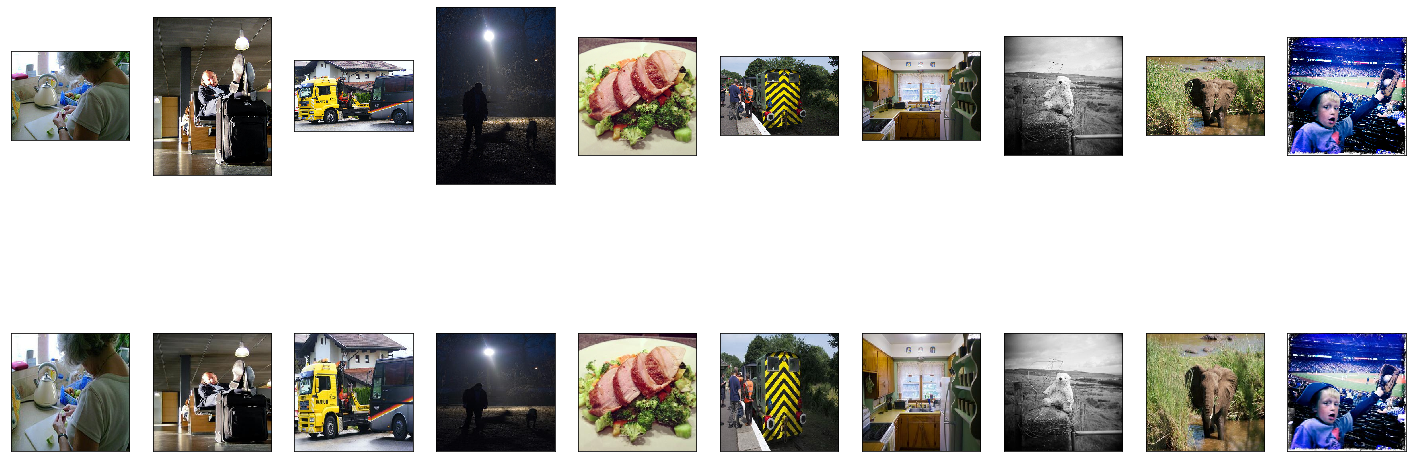

In [41]:
import numpy as np
from matplotlib import pyplot as plt

# Check some original and resized images
n_image_check = 10
index_check = np.random.randint(0, images_name.size, (n_image_check,))
fig = plt.figure(figsize=(25, 10))
for count, index in enumerate(index_check):
    # Original
    original_image_dir = os.path.join(original_image_folder, images_name[index])
    original_image = plt.imread(original_image_dir)
    ax = fig.add_subplot(2, n_image_check, count+1)
    plt.imshow(original_image)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)  
    
    # Resize
    resize_image_dir = os.path.join(select_image_folder, images_name[index])
    resize_image = plt.imread(resize_image_dir) 
    ax = fig.add_subplot(2, n_image_check, count+n_image_check+1)
    plt.imshow(resize_image)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)      

In [42]:
import shutil
shutil.make_archive("thumbnails", 'zip', select_image_folder)

'C:\\D disk\\Columbia courses\\Applied deep learning\\homeworks\\4\\thumbnails.zip'